In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re
import ftfy
from wordcloud import WordCloud

In [2]:
# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/jon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
def preprocess_text(text):
    # Corregir problemas de codificación con ftfy
    text = ftfy.fix_text(text)

    # Convertir a minúsculas
    text = text.lower()

    # Eliminar caracteres especiales y números, pero mantener espacios
    text = re.sub(r'[^a-záéíóúñü\s]', '', text)

    # Tokenización
    tokens = word_tokenize(text)

    # Eliminar stopwords
    stop_words = set(stopwords.words('spanish'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lematización
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    return ' '.join(tokens)

In [4]:
# Cargar los datos
data = pd.read_excel('ODScat_345.xlsx')

In [5]:
# Aplicar ftfy a la columna 'Textos_espanol'
data['Textos_espanol'] = data['Textos_espanol'].apply(ftfy.fix_text)

In [6]:
# Aplicar preprocesamiento a la columna de texto
data['texto_preprocesado'] = data['Textos_espanol'].apply(preprocess_text)

In [7]:
# Eliminar filas con texto preprocesado vacío
data_cleaned = data[data['texto_preprocesado'] != '']

In [8]:
# Imprimir información sobre el preprocesamiento
print(f"Número de filas antes del preprocesamiento: {len(data)}")
print(f"Número de filas después del preprocesamiento: {len(data_cleaned)}")
print("\nPrimeras filas después del preprocesamiento:")
print(data_cleaned[['texto_preprocesado']].head())

Número de filas antes del preprocesamiento: 4049
Número de filas después del preprocesamiento: 4049

Primeras filas después del preprocesamiento:
                                  texto_preprocesado
0  ejemplo número consulta externa especialista c...
1  gobierno central financió directament solo gas...
2  clarament factor juego particular variedad bar...
3  ejemplo australiano victoria creó agencia prom...
4  consumo anual alcohol estima litro año hombr e...


In [9]:
# Dividir los datos en conjunto de entrenamiento y prueba
X = data_cleaned['texto_preprocesado']
y = data_cleaned['sdg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Crear el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [11]:
# Ajustar y transformar los datos de entrenamiento
X_train = tfidf_vectorizer.fit_transform(X_train)

In [12]:
# Transformar los datos de prueba
X_test = tfidf_vectorizer.transform(X_test)

In [13]:
print("Dimensiones de los datos de entrenamiento:", X_train.shape)
print("Dimensiones de los datos de prueba:", X_test.shape)

Dimensiones de los datos de entrenamiento: (3239, 5000)
Dimensiones de los datos de prueba: (810, 5000)


In [14]:
arbol = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
arbol

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [15]:
arbol = arbol.fit(X_train,y_train)

In [16]:
y_pred = arbol.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

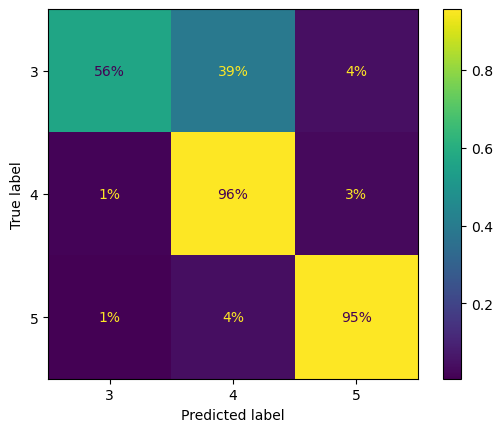

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="true", values_format=".0%")
plt.show

In [18]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

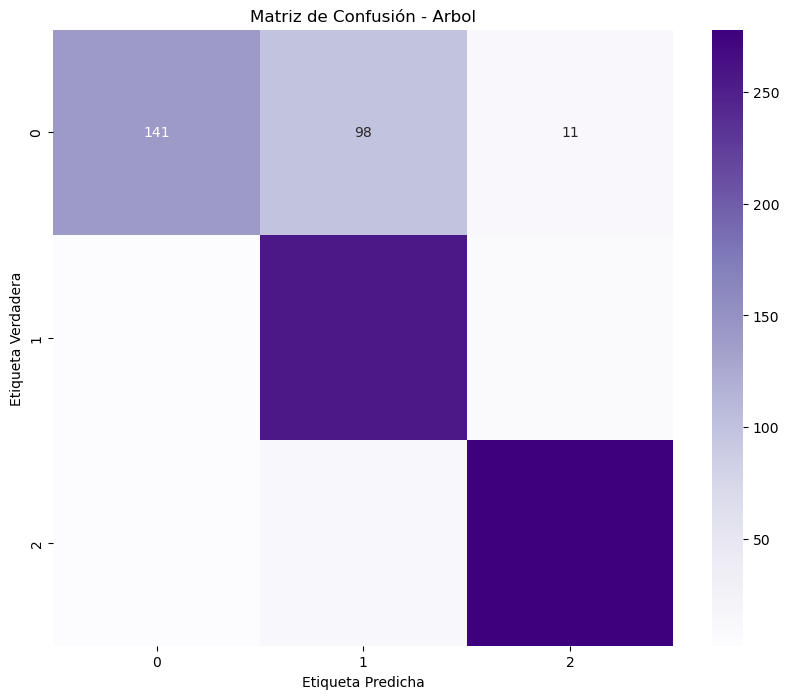

In [19]:
# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('Matriz de Confusión - Arbol')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()

In [20]:
# Imprimir el informe de clasificación
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))


Informe de Clasificación:
              precision    recall  f1-score   support

           3       0.96      0.56      0.71       250
           4       0.70      0.96      0.81       268
           5       0.94      0.95      0.94       292

    accuracy                           0.83       810
   macro avg       0.86      0.82      0.82       810
weighted avg       0.86      0.83      0.83       810



In [21]:
# Calcular y mostrar el F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"\nF1-score (ponderado): {f1:.4f}")


F1-score (ponderado): 0.8267


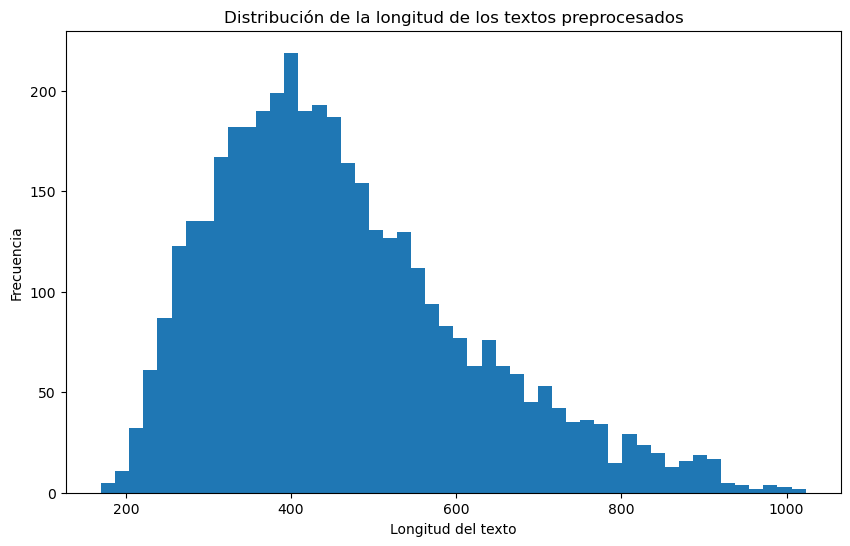

In [22]:
# Visualización de la longitud de los textos
plt.figure(figsize=(10, 6))
data_cleaned['longitud_texto'] = data_cleaned['texto_preprocesado'].apply(len)
plt.hist(data_cleaned['longitud_texto'], bins=50)
plt.title('Distribución de la longitud de los textos preprocesados')
plt.xlabel('Longitud del texto')
plt.ylabel('Frecuencia')
plt.show()

In [23]:
# Nube de palabras de los textos preprocesados
all_words = ' '.join(data_cleaned['texto_preprocesado'])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

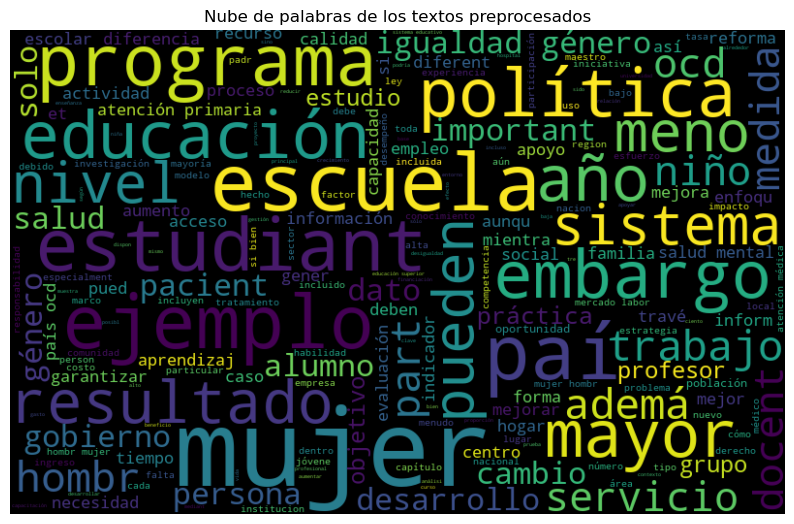

In [24]:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Nube de palabras de los textos preprocesados')
plt.show()

In [25]:
print("\nDistribución de etiquetas:")
print(data_cleaned['sdg'].value_counts(normalize=True))


Distribución de etiquetas:
sdg
5    0.358360
4    0.334404
3    0.307236
Name: proportion, dtype: float64


In [26]:
data_p=pd.read_excel('TestODScat_345.xlsx', sheet_name=None)

In [27]:
data_p['Test'].isnull().sum()

Textos_espanol      0
sdg               702
dtype: int64

In [28]:
datap = data_p['Test'].copy()

In [29]:
# Aplicar ftfy a la columna 'Textos_espanol'
datap['Textos_espanol'] = datap['Textos_espanol'].apply(ftfy.fix_text)

In [30]:
# Aplicar preprocesamiento a la columna de texto
datap['texto_preprocesado'] = datap['Textos_espanol'].apply(preprocess_text)

In [31]:
# Eliminar filas con texto preprocesado vacío
datap_cleaned = datap[datap['texto_preprocesado'] != '']

In [32]:
# Imprimir información sobre el preprocesamiento
print(f"Número de filas antes del preprocesamiento: {len(datap)}")
print(f"Número de filas después del preprocesamiento: {len(datap_cleaned)}")
print("\nPrimeras filas después del preprocesamiento:")
print(datap_cleaned[['texto_preprocesado']].head())

Número de filas antes del preprocesamiento: 702
Número de filas después del preprocesamiento: 702

Primeras filas después del preprocesamiento:
                                  texto_preprocesado
0  examinado contribución universidad institucion...
1  última década particular número alta per cápit...
2  país estudiant alto rendimiento sienten atraíd...
3  raíz preocupación hecho médico sistema sanitar...
4  h are abald ij pequeño número estudiant docent...


In [33]:
# Transformar los datos de prueba
Xp_test = datap_cleaned['texto_preprocesado']
Xp_test = tfidf_vectorizer.transform(Xp_test)

In [34]:
# Realizar predicciones
yp_pred = arbol.predict(Xp_test)

In [35]:
Xp_test.shape

(702, 5000)

In [36]:
yp_pred

array([4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 3, 5, 4,
       4, 3, 5, 5, 4, 4, 4, 4, 4, 5, 4, 5, 4, 4, 4, 4, 4, 5, 4, 3, 4, 4,
       4, 5, 5, 4, 4, 4, 5, 5, 5, 4, 5, 4, 5, 4, 5, 4, 4, 5, 5, 3, 4, 4,
       4, 4, 5, 4, 4, 5, 5, 5, 5, 4, 4, 4, 4, 5, 3, 4, 5, 5, 4, 4, 4, 4,
       4, 5, 4, 4, 3, 4, 3, 4, 5, 5, 5, 4, 4, 4, 3, 3, 3, 4, 5, 4, 5, 4,
       5, 3, 4, 4, 5, 4, 4, 5, 3, 4, 5, 3, 4, 4, 4, 5, 4, 4, 5, 4, 4, 4,
       4, 3, 3, 4, 4, 4, 4, 4, 5, 4, 5, 5, 4, 5, 4, 5, 5, 4, 3, 4, 3, 5,
       5, 4, 4, 4, 4, 5, 5, 3, 4, 4, 5, 4, 4, 4, 5, 5, 3, 5, 3, 4, 5, 5,
       4, 4, 4, 4, 4, 5, 3, 3, 5, 4, 4, 4, 5, 5, 3, 4, 5, 5, 4, 5, 3, 3,
       4, 4, 5, 4, 5, 4, 5, 4, 5, 4, 4, 3, 3, 5, 4, 4, 4, 4, 5, 4, 5, 4,
       4, 3, 4, 4, 4, 5, 4, 5, 4, 4, 4, 5, 4, 5, 4, 5, 5, 3, 5, 5, 5, 4,
       4, 5, 4, 4, 4, 4, 5, 3, 5, 4, 4, 3, 5, 4, 3,